In [3]:
from agents import Agent, Runner, function_tool, ItemHelpers


@function_tool
def get_weather(city: str):
    """Get weather by city"""
    return "30 degrees"


agent = Agent(
    name="Assistant Agent",
    instructions="You are a helpful assistant. Use tools when needed to answer questions",
    model='gpt-4o-mini',
    tools=[get_weather],
)

stream = Runner.run_streamed(
    agent, "Hello how are you? What is the weather in the capital of Spain?"
)

async for event in stream.stream_events():

    if event.type == "raw_response_event":
        continue
    elif event.type == "agent_updated_stream_event":
        print("Agent updated to", event.new_agent.name)
    elif event.type == "run_item_stream_event":
        if event.item.type == "tool_call_item":
            print(event.item.raw_item.to_dict())
        elif event.item.type == "tool_call_output_item":
            print(event.item.output)
        elif event.item.type == "message_output_item":
            print(ItemHelpers.text_message_output(event.item))
    print("=" * 20)

Agent updated to Assistant Agent
{'arguments': '{"city":"Madrid"}', 'call_id': 'call_9jnemIEujwEiKm1oLN8t85jt', 'name': 'get_weather', 'type': 'function_call', 'id': 'fc_68cba481595081a09ff498ce19f6b3ef050e3192ac17a402', 'status': 'completed'}
30 degrees
Hello! I'm doing well, thank you. The weather in Madrid, the capital of Spain, is 30 degrees Celsius.


In [5]:
from agents import Agent, Runner, function_tool, ItemHelpers


@function_tool
def get_weather(city: str):
    """Get weather by city"""
    return "30 degrees"


agent = Agent(
    name="Assistant Agent",
    instructions="You are a helpful assistant. Use tools when needed to answer questions",
    model='gpt-4o-mini',
    tools=[get_weather],
)

stream = Runner.run_streamed(
    agent, "Hello how are you? What is the weather in the capital of Spain?"
)

message = ""
args = ""

async for event in stream.stream_events():

    if event.type == "raw_response_event":
        event_type = event.data.type
        if event_type == "response.output_text.delta":
            message += event.data.delta
            print(message)
        elif event_type == "response.function_call_arguments.delta":
            args += event.data.delta
            print(args)
        elif event_type == "response.completed":
            message = ""
            args = ""

{"
{"city
{"city":"
{"city":"Madrid
{"city":"Madrid"}
Hello
Hello!
Hello! I'm
Hello! I'm doing
Hello! I'm doing well
Hello! I'm doing well,
Hello! I'm doing well, thank
Hello! I'm doing well, thank you
Hello! I'm doing well, thank you.
Hello! I'm doing well, thank you. The
Hello! I'm doing well, thank you. The weather
Hello! I'm doing well, thank you. The weather in
Hello! I'm doing well, thank you. The weather in Madrid
Hello! I'm doing well, thank you. The weather in Madrid,
Hello! I'm doing well, thank you. The weather in Madrid, the
Hello! I'm doing well, thank you. The weather in Madrid, the capital
Hello! I'm doing well, thank you. The weather in Madrid, the capital of
Hello! I'm doing well, thank you. The weather in Madrid, the capital of Spain
Hello! I'm doing well, thank you. The weather in Madrid, the capital of Spain,
Hello! I'm doing well, thank you. The weather in Madrid, the capital of Spain, is
Hello! I'm doing well, thank you. The weather in Madrid, the capital of Spain

In [8]:
from agents import Agent, Runner, SQLiteSession

session = SQLiteSession("user_1", "ai-memory.db")


geaography_agent = Agent(
    name="Geo Expert Agent",
    instructions="You are a expert in geography, you answer questions related to them.",
    model="gpt-4o-mini",
    handoff_description="Use this to answer geography related questions.",
)
economics_agent = Agent(
    name="Economics Expert Agent",
    instructions="You are a expert in economics, you answer questions related to them.",
    model="gpt-4o-mini",
    handoff_description="Use this to answer economics questions.",
)

main_agent = Agent(
    name="Main Agent",
    model="gpt-4o-mini",
    instructions="You are a user facing agent. Transfer to the agent most capable of answering the user's question.",
    handoffs=[
        economics_agent,
        geaography_agent,
    ],
)

In [9]:
result = await Runner.run(
    main_agent,
    "Why do countries sell bonds?",
    session=session,
)

print(result.last_agent.name)
print(result.final_output)

Economics Expert Agent
Countries sell bonds for several key reasons:

1. **Financing Government Spending**: Bonds are a way for governments to raise funds to finance budget deficits, infrastructure projects, public services, and welfare programs without increasing taxes immediately.

2. **Debt Management**: Selling bonds allows governments to manage their existing debt. By issuing new bonds, they can pay off older, higher-interest debt with newer, potentially lower-interest debt, thereby managing overall borrowing costs.

3. **Economic Stimulus**: During economic downturns, governments may issue bonds to raise funds for stimulus measures aimed at boosting demand and promoting economic growth.

4. **Public Investment**: Bonds can be used to fund long-term investments that can help stimulate growth, such as in transportation, education, or healthcare.

5. **Market Signals**: The issuance of bonds may also send signals to the market about the government's fiscal health and intentions, inf

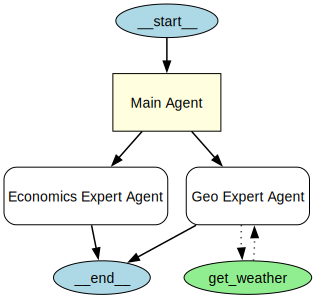

In [1]:
from agents import Agent, Runner, SQLiteSession, function_tool
from agents.extensions.visualization import draw_graph
from pydantic import BaseModel

session = SQLiteSession("user_1", "ai-memory.db")


class Answer(BaseModel):
    answer: str
    background_explanation: str


@function_tool
def get_weather():
    return "30"


geaography_agent = Agent(
    name="Geo Expert Agent",
    model="gpt-4o-mini",
    instructions="You are a expert in geography, you answer questions related to them.",
    handoff_description="Use this to answer geography related questions.",
    tools=[
        get_weather,
    ],
    output_type=Answer,
)
economics_agent = Agent(
    name="Economics Expert Agent",
    model="gpt-4o-mini",
    instructions="You are a expert in economics, you answer questions related to them.",
    handoff_description="Use this to answer economics questions.",
)

main_agent = Agent(
    name="Main Agent",
    model="gpt-4o-mini",
    instructions="You are a user facing agent. Transfer to the agent most capable of answering the user's question.",
    handoffs=[
        economics_agent,
        geaography_agent,
    ],
)

draw_graph(main_agent)

In [2]:
result = await Runner.run(
    main_agent,
    "What is the capital of Thailand's northen province.",
    session=session,
)

print(result.last_agent.name)
print(result.final_output)

Geo Expert Agent
answer="The capital of Thailand's northern province, Chiang Mai, is also called Chiang Mai. It is the largest city in the northern region and serves as an important cultural and economic center." background_explanation="Chiang Mai is known for its historic temples, vibrant markets, and as a gateway to northern Thailand's natural attractions. It is a popular destination for both tourists and locals, offering a mix of modern amenities and traditional culture."
